In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import numpy as np
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
bag_df = pd.read_csv('bag_words_amostra.csv', sep=';')

In [3]:
bag_df.columns = ['codigo','link', 'categoria', 'texto']

In [4]:
bag_df.head()

,codigo,link,categoria,texto
0,0,http://g1.globo.com/sp/sao-carlos-regiao/notic...,agro,fundo defesa citricultura fundecitrus araraqua...
1,1,http://g1.globo.com/sp/piracicaba-regiao/notic...,agro,universidade paulo usp piracicabasp anunciou i...
2,2,http://g1.globo.com/economia/agronegocios/noti...,agro,exportações carne bovina brasil deverão cresce...
3,3,http://g1.globo.com/economia/midia-e-marketing...,agro,mcdonalds saladas compostas vegetais orgânicos...
4,4,http://g1.globo.com/sp/sao-carlos-regiao/notic...,agro,utilizando substâncias homeopáticas pesquisado...


In [5]:
bag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 4 columns):
codigo       702 non-null int64
link         702 non-null object
categoria    702 non-null object
texto        428 non-null object
dtypes: int64(1), object(3)
memory usage: 22.0+ KB


In [6]:
bag_df.describe()

,codigo
count,702.000000
mean,350.500000
std,202.794231
min,0.000000
25%,175.250000
50%,350.500000
75%,525.750000
max,701.000000


In [7]:
bag_df_clean = bag_df.dropna()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    bag_df_clean.texto, bag_df_clean.categoria
)

In [8]:
def do_forest(n_estimators, accuracy):
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    forest = RandomForestClassifier(n_estimators=n_estimators) 
    pipe = Pipeline([('vect', vectorizer), ('forest', forest)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

In [9]:
accuracy = []

for n in range(1,150):
    do_forest(n, accuracy)

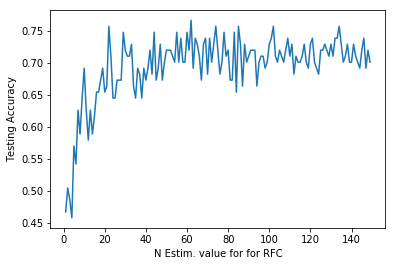

In [10]:
plt.plot(range(1, 150), accuracy)
plt.xlabel('N Estim. value for for RFC')
plt.ylabel('Testing Accuracy')

In [11]:
import sklearn
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('bag_words_amostra.csv', sep=';')
file = 'C:\DATA\DATA_Fernanda\MESTRADO\2017\MACHINE LEARNING\PROJETO PYTHON\Categorization'

def train(df, file):
    print ('\nTraining...')
    df = df.dropna()
    train_size = 0.8
    vectorizer = CountVectorizer(
        analyzer="word",
        tokenizer=None,
        preprocessor=None,
        stop_words=None
    )
    logreg = LogisticRegression()
    pipe = Pipeline([('vect', vectorizer), ('logreg', logreg)])
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
        df.texto, df.categoria, train_size=train_size
    )
    pipe.fit(X_train, Y_train)
    accuracy = pipe.score(X_test, Y_test)
    msg = '\treinamento'.format(train_size, accuracy)
    print (msg)
    pipe.fit(df.texto, df.categoria)
    joblib.dump(pipe, file)

In [12]:
def pre_processor(link):
    stops = set(stopwords.words("portuguese"))
    #goose = Goose()
    #article = goose.extract(link)
    #article = LinksExtractor(link)
    #....
    return words

In [13]:
url = 'http://gshow.globo.com/ep/cores-de-novela/noticia/qual-cor-da-parede-combina-mais-com-seu-estilo.ghtml'
file = 'C:\DATA\DATA_Fernanda\MESTRADO\2017\MACHINE LEARNING\PROJETO PYTHON\Categorization'

def predict(url, file):
    pipe = joblib.load(file)
    words = pre_processor(url)
    resp = pipe.predict([words])
    print ("Category: " % resp[0])
    resp = zip(pipe.classes_, pipe.predict_proba([words])[0])
    resp.sort(key=lambda tup: tup[1], reverse=True)
    for cat, prob in resp:
        print ("Category {:16s} with {:.1%} probab.".format(cat, prob))